# Predicting the costs of used cars 

### Features: <font size=3>
<ul>
<li>Name: The brand and model of the car.</li>
<li>Location: The location in which the car is being sold or is available for purchase.</li>
<li>Year: The year or edition of the model.</li>
<li>Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.</li>
<li>Fuel_Type: The type of fuel used by the car.</li>
<li>Transmission: The type of transmission used by the car.</li>
<li>Owner_Type: Whether the ownership is Firsthand, Second hand or other.</li>
<li>Mileage: The standard mileage offered by the car company in kmpl or km/kg</li>
<li>Engine: The displacement volume of the engine in cc.</li>
<li>Power: The maximum power of the engine in bhp.</li>
<li>Seats: The number of seats in the car.</li>
<li>Price: The price of the used car in INR Lakhs.</li>
</ul>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_train=pd.read_excel("Data_Train.xlsx")
df_test=pd.read_excel("Data_Test.xlsx")
df_train

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


<font size=3>
There are 6019 rows and 12 columns

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


<font size=3>
We can observe null values in 4 columns

In [4]:
df_train.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [5]:
df_train.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

<font size=3>
We have-<ul><li>2 null values in Mileage</li>
          <li>36 null values in Engine</li>
          <li>36 null values in Power</li>
          <li>42 null values in Seats</li>
        </ul>

In [6]:
df_train.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [7]:
df_train["Name"]=df_train.Name.str.split().str.get(0)
df_test['Name'] = df_test.Name.str.split().str.get(0)
df_train.head()
#shortening the names of cars

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


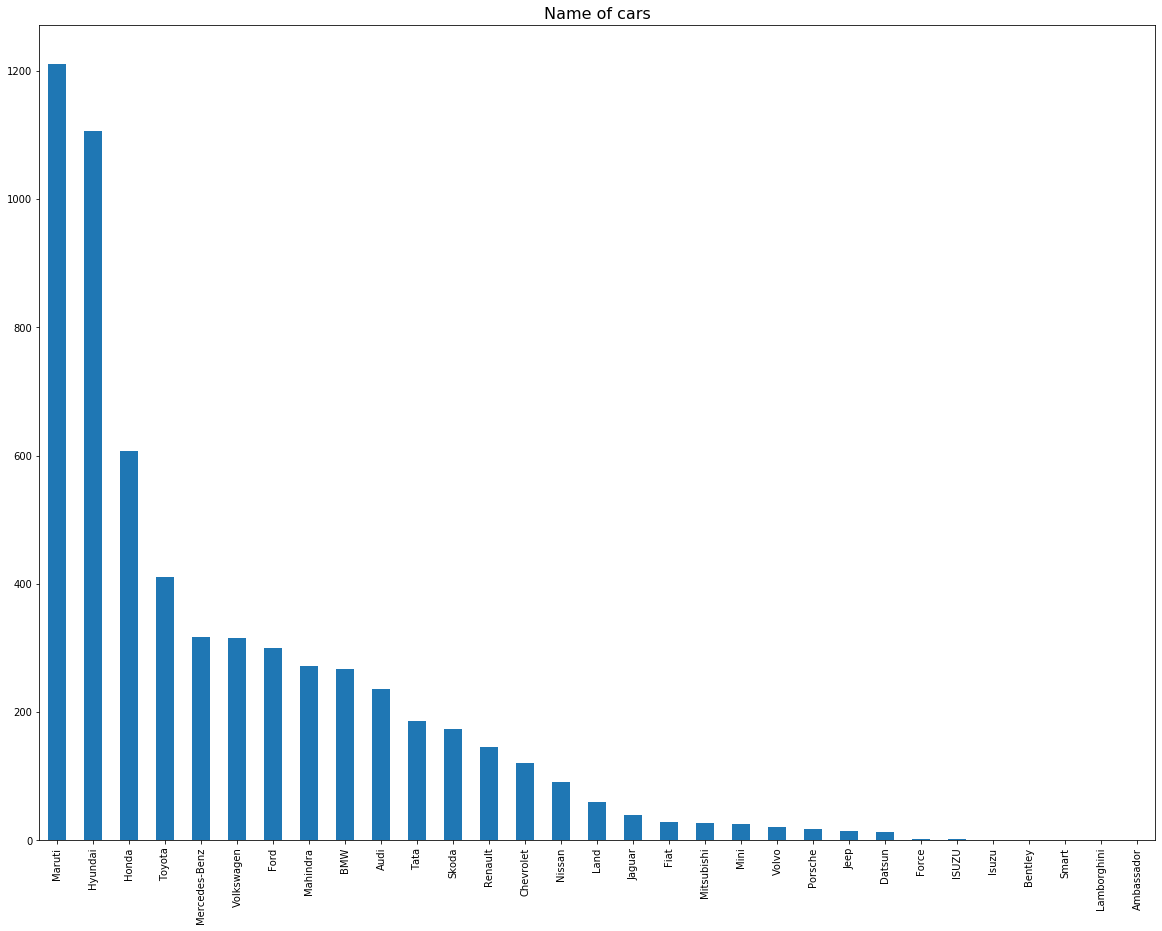

In [8]:
plt.figure(figsize=(20,15))
df_train.Name.value_counts().plot(kind='bar')
plt.title("Name of cars",fontdict={'fontsize':16})
plt.show()

<font size=3>
    Maruti and Hyundai are mostly purchased cars.

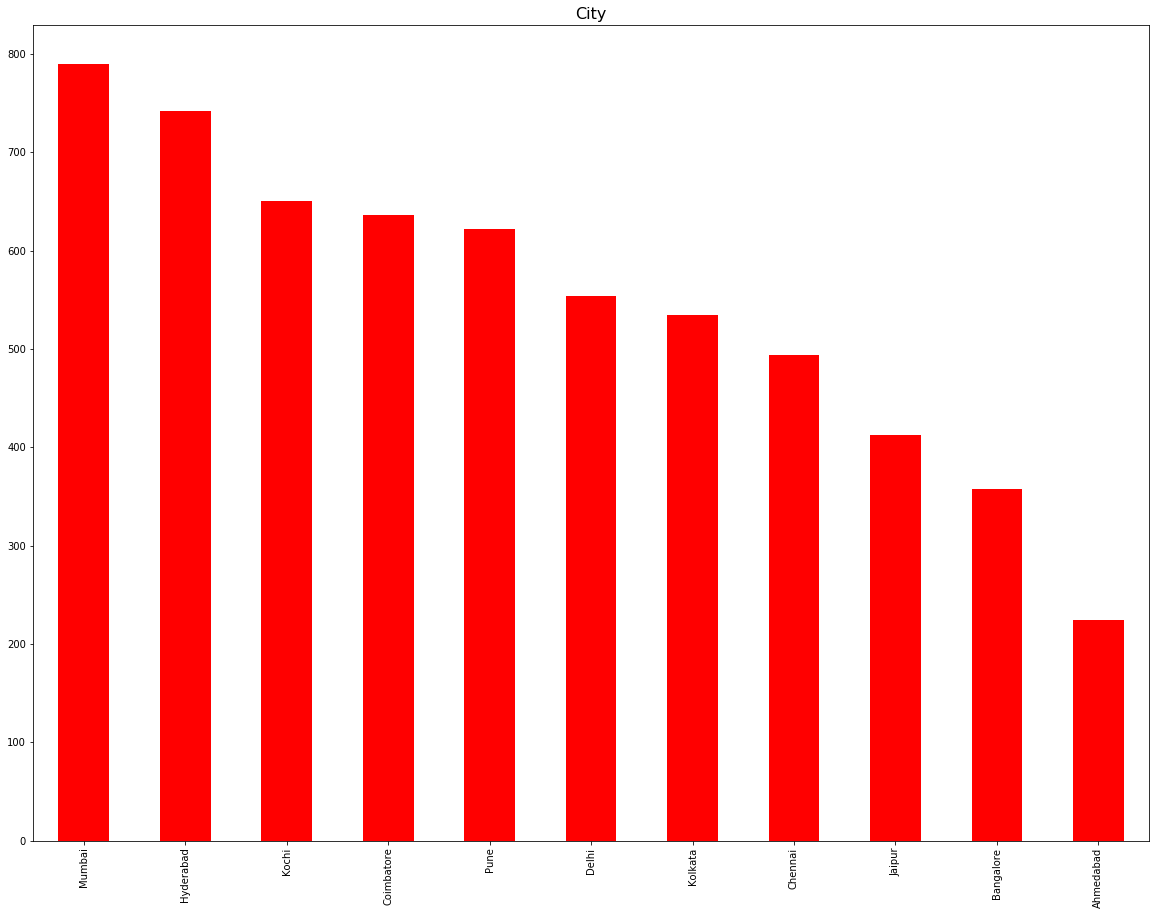

In [9]:
plt.figure(figsize=(20,15))
df_train.Location.value_counts().plot(kind='bar',color='red')
plt.title("City",fontdict={'fontsize':16})
plt.show()

<font size=3>
    Cars are mostly purchased in Mumbai and Hyderabad citites.

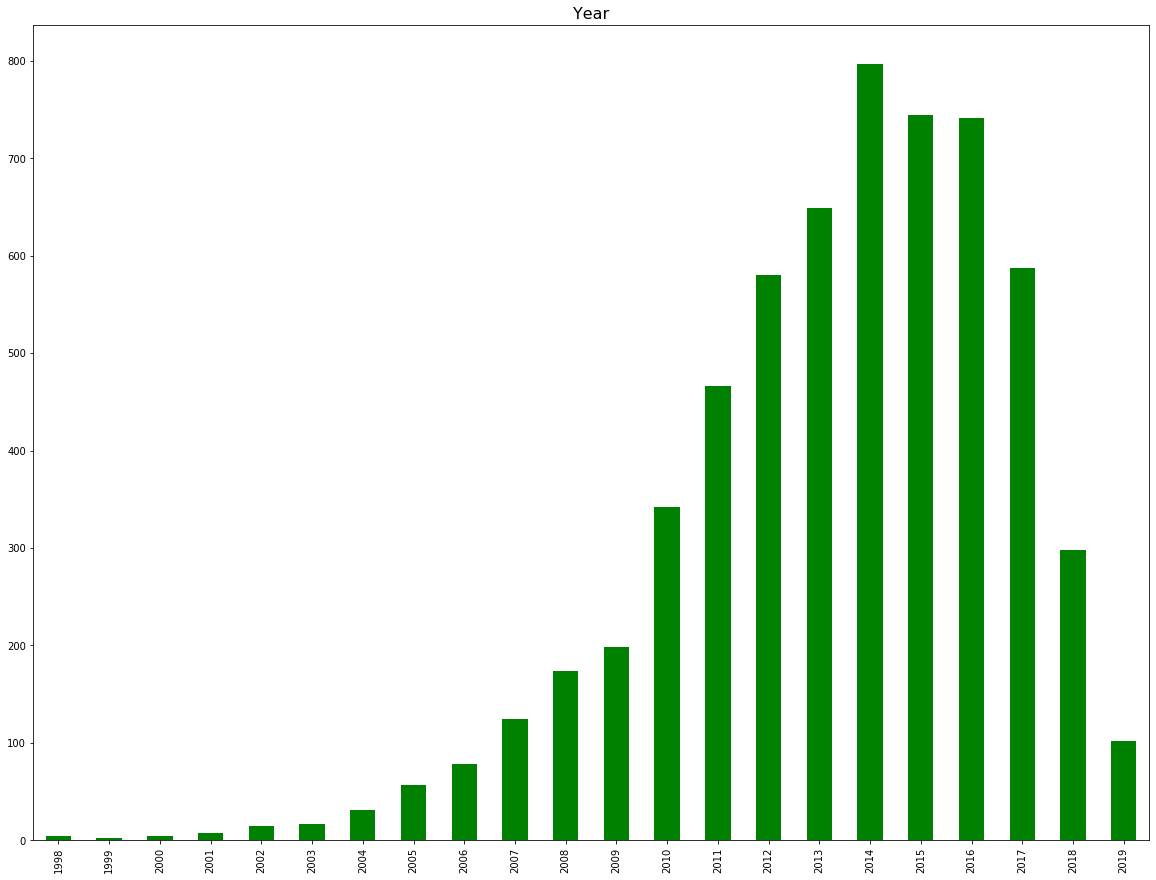

In [10]:
plt.figure(figsize=(20,15))
df_train.Year.value_counts().sort_index().plot(kind='bar',color='green')
plt.title("Year",fontdict={'fontsize':16})
plt.show()

<font size=3>
Sale of cars increased from 1999-2014 and then decreased to some extent during 2014-2019

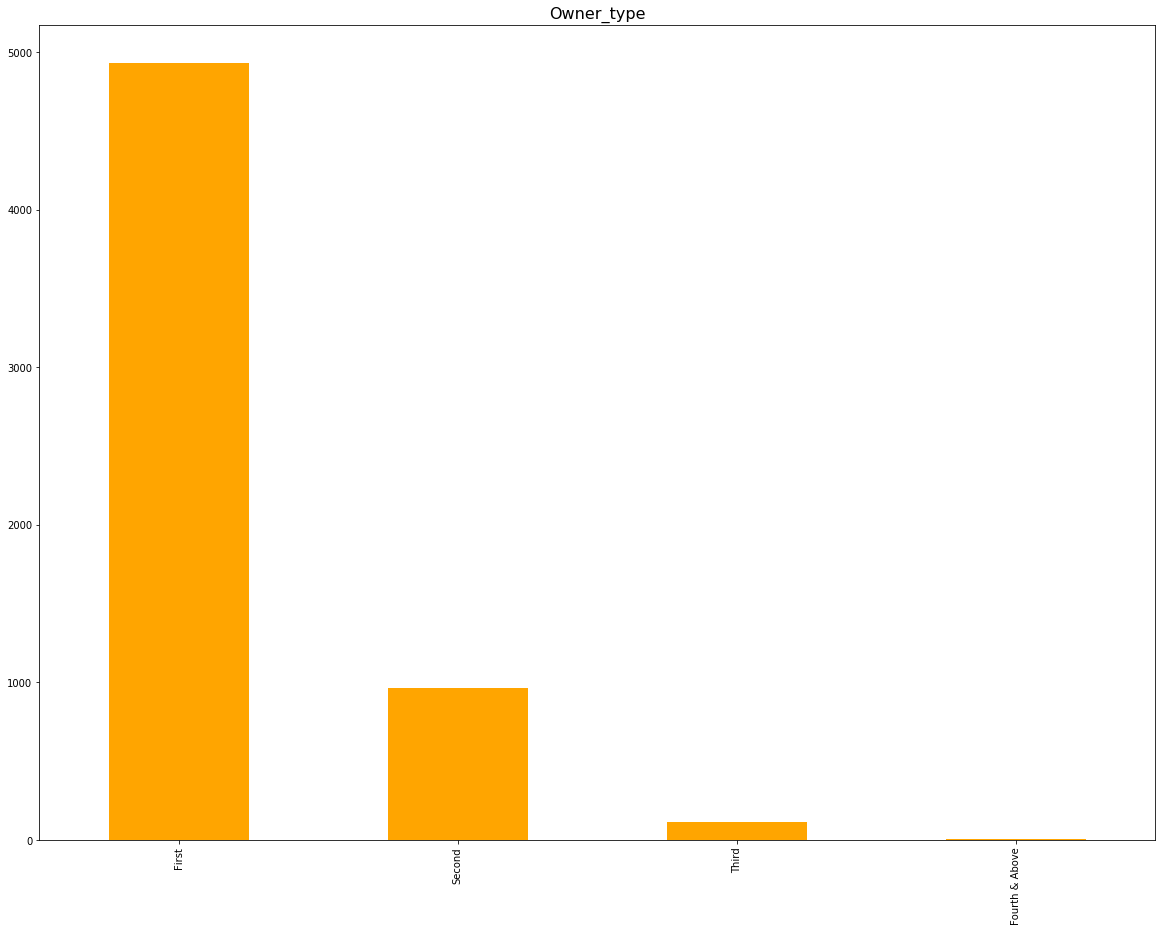

In [11]:
plt.figure(figsize=(20,15))
df_train.Owner_Type.value_counts().plot(kind='bar',color='orange')
plt.title("Owner_type",fontdict={'fontsize':16})
plt.show()

<font size=3>
Most of the people prefered first hand i.e, new cars.

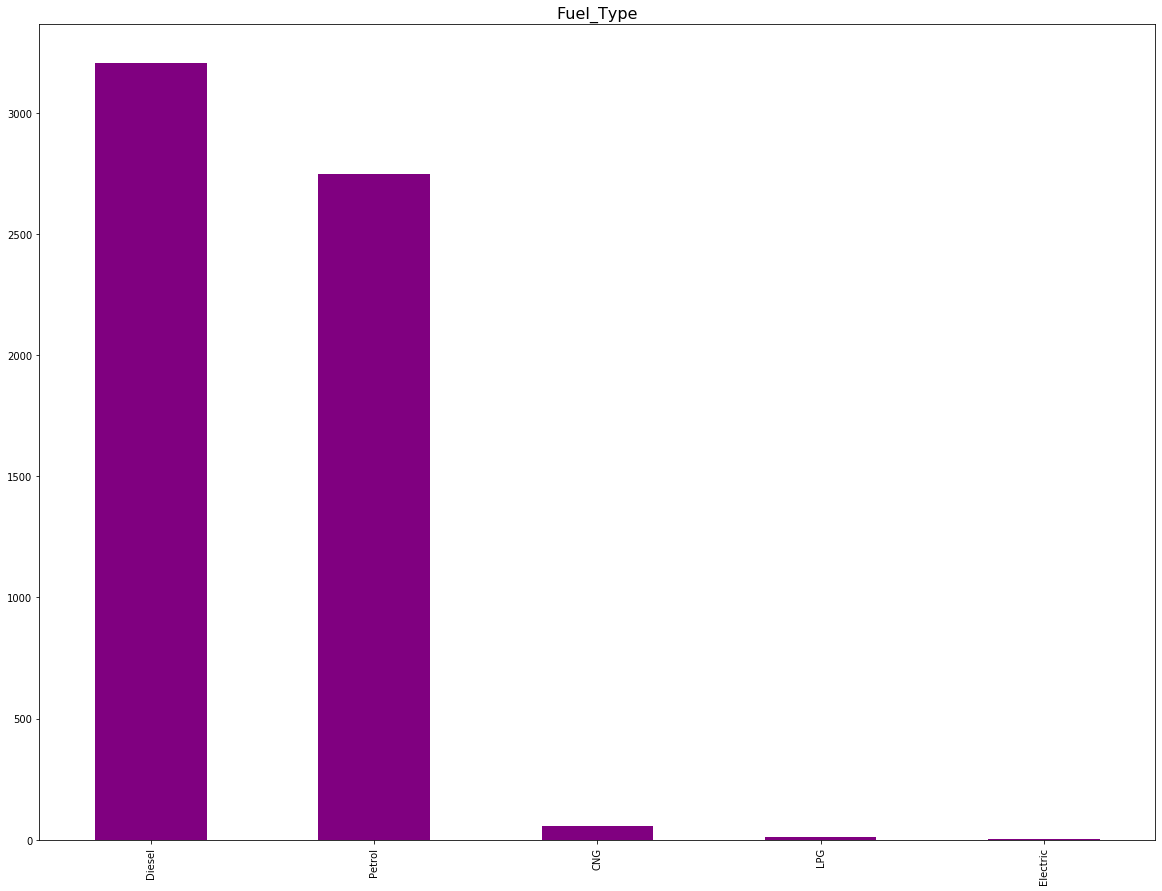

In [12]:
plt.figure(figsize=(20,15))
df_train.Fuel_Type.value_counts().plot(kind='bar',color='purple')
plt.title("Fuel_Type",fontdict={'fontsize':16})
plt.show()

<font size=3>
Most of the cars run with diesel followed by petrol.

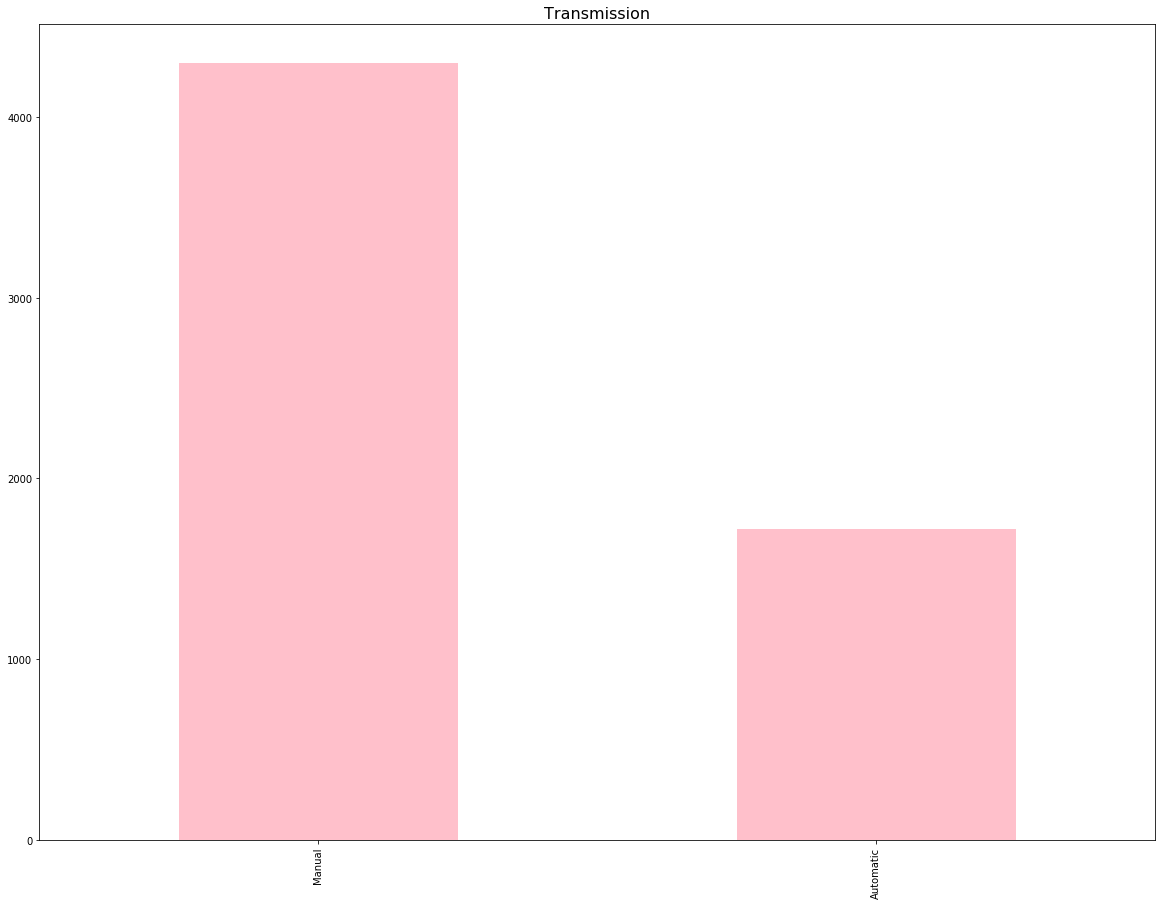

In [13]:
plt.figure(figsize=(20,15))
df_train.Transmission.value_counts().plot(kind='bar',color='pink')
plt.title("Transmission",fontdict={'fontsize':16})
plt.show()

<font size=3>
    More than 50% opted for manual driving cars

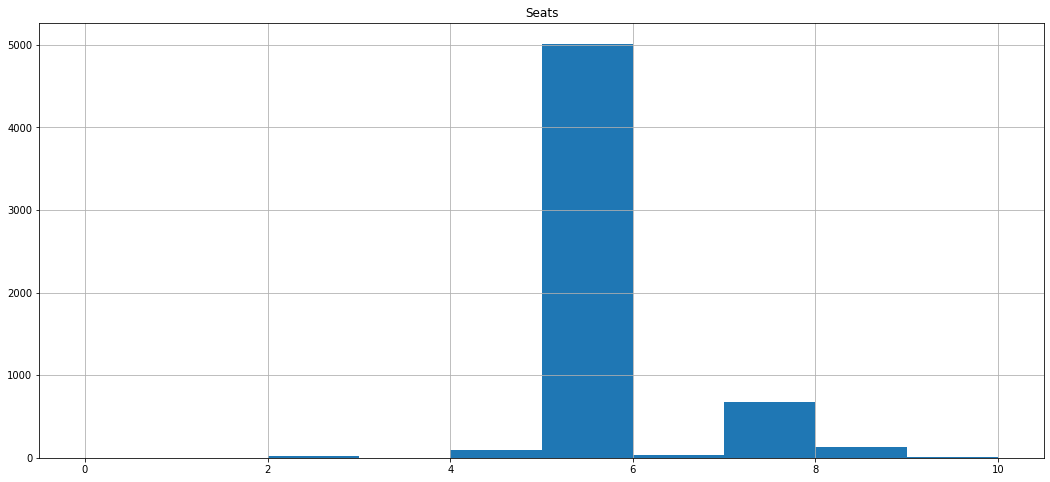

In [14]:
df_features = ['Mileage', 'Engine','Power','Seats']
df_train[df_features].hist(figsize=(18, 8));

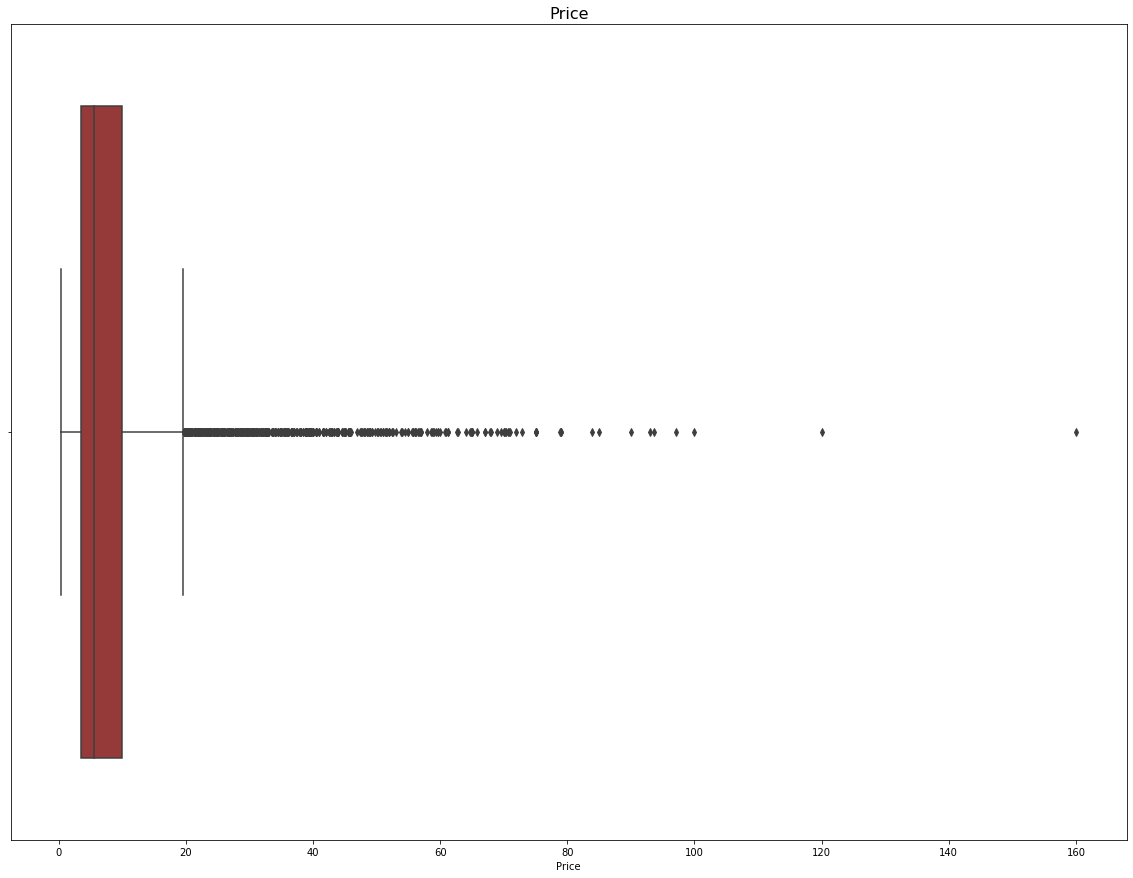

In [15]:
plt.figure(figsize=(20,15))
sns.boxplot(df_train['Price'],color='brown')
plt.title("Price",fontdict={'fontsize':16})
plt.show()

<font size=3>
    Most of the people opted to buy cars in the range 3,00,000-10,00,000

In [16]:
data_model = pd.concat([df_train,df_test], sort=False)

### Target variable: price of car

Text(0.5, 1.0, 'Density or Relative Frequency Of Cars By Price')

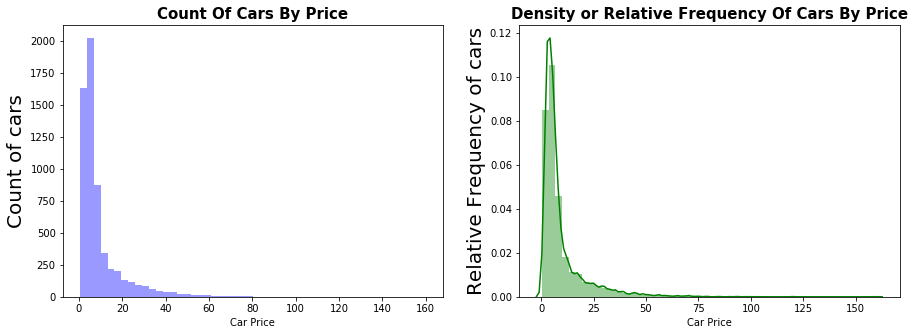

In [17]:
# target variable: price of car
fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(data_model['Price'], norm_hist=False, kde=False, ax=ax[0], color='blue')
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=20)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(data_model['Price'], kde=True, ax=ax[1], color='green')
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=20)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold")

### Observations on Target Variable- Price:
<font size=3>
<p> </p>    
<p>The target variable price has a positive skew, however majority of the cars are low priced.</p>

<p>More than 50% of the cars are priced between 2 to 15 lakhs and close to 17% cars are priced between 20 to 40 lakhs. So around 85% of cars in market are priced between 2 to 40lakhs.</p>

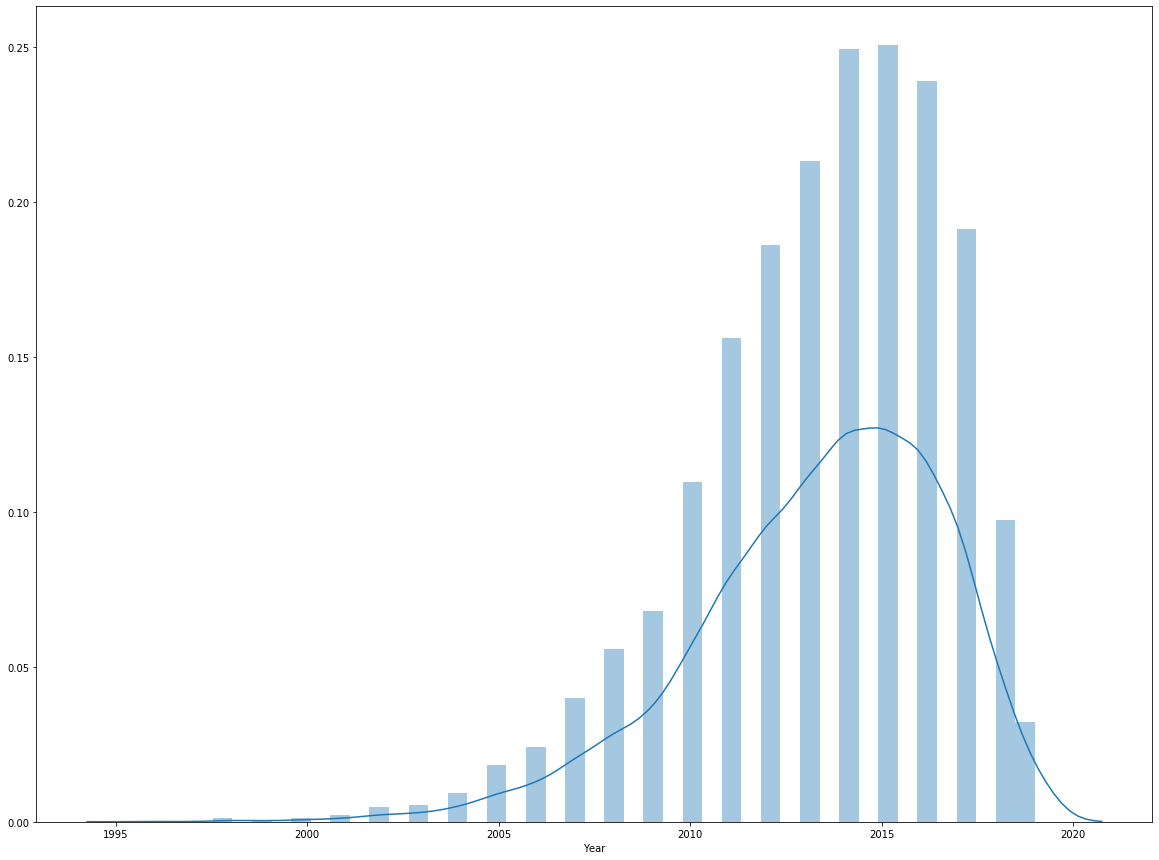

In [18]:
plt.figure(figsize=(20,15))
sns.distplot(data_model['Year'])
plt.show()

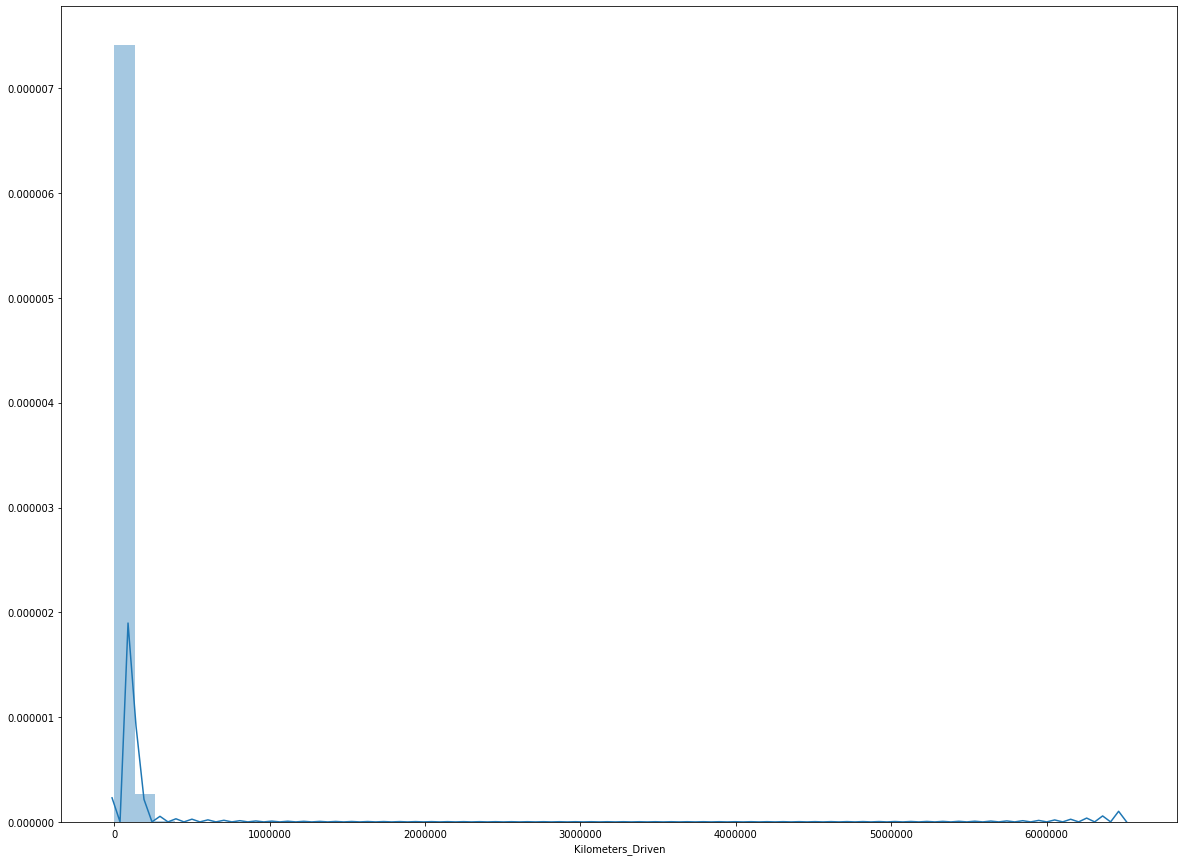

In [19]:
plt.figure(figsize=(20,15))
sns.distplot(data_model['Kilometers_Driven'])
plt.show()

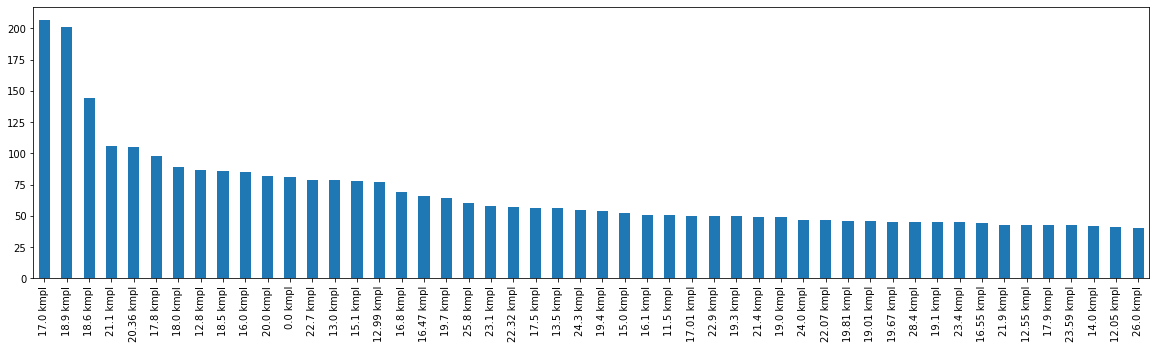

In [20]:
plt.figure(figsize=(20,5))
data_model['Mileage'].value_counts().head(50).plot.bar()
plt.show()

<font size=3>
 17.0 kmpl is the most repeated value, so we will fill the null values in Mileage with it.

In [21]:
df_train['Mileage']=df_train['Mileage'].fillna("17.0 kmpl")
df_test['Mileage']=df_test['Mileage'].fillna("17.0 kmpl")
#we noticed that mileage value even filled with 0.0,so replace them
df_train['Mileage']=df_train['Mileage'].replace("0.0","17.0 kmpl")
df_test['Mileage']=df_test['Mileage'].replace("0.0","17.0 kmpl")

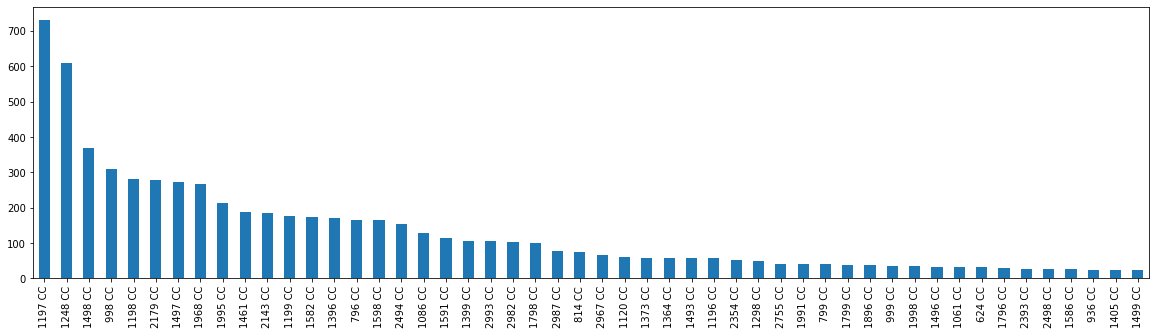

In [22]:
plt.figure(figsize=(20,5))
data_model['Engine'].value_counts().head(50).plot.bar()
plt.show()

<font size=3>
1197 CC is the most repeated value, so we will fill the null values in Engine with it.

In [23]:
df_train['Engine']=df_train['Engine'].fillna("1197 CC")
df_test['Engine']=df_test['Engine'].fillna("1197 CC")

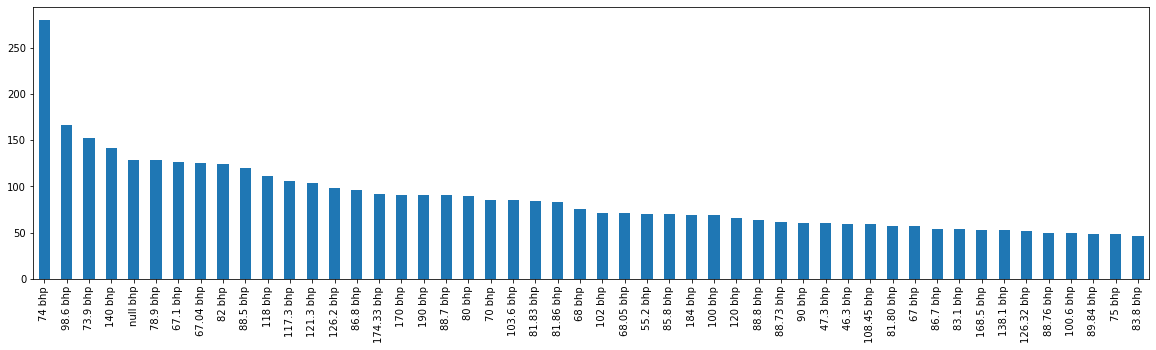

In [24]:
plt.figure(figsize=(20,5))
data_model['Power'].value_counts().head(50).plot.bar()
plt.show()

<font size=3>
74 bhp is the most repeated value, so we will fill null values in Power with it.

In [25]:
df_train['Power']=df_train['Power'].fillna("74 bhp")
df_test['Power']=df_test['Power'].fillna("74 bhp")
#we noticed that power has null keyword values,so replace them
df_train['Power']=df_train['Power'].replace("null","74 bhp")
df_test['Power']=df_test['Power'].replace("null","74 bhp")

<font size=3>
We will replace the null values in Seats with mean.

In [26]:
df_train['Seats'].fillna(df_train['Seats'].mean(),inplace=True)
df_test['Seats'].fillna(df_test['Seats'].mean(),inplace=True)

In [27]:
df_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

<font size=3>
    All the null values are replaced

In [28]:
df_test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
dtype: int64

<font size=3>
    All the null values are replaced

In [29]:
df_train.Mileage=df_train.Mileage.str.replace(' km/kg','').str.replace(' kmpl','').astype(float)
df_train.Engine=df_train.Engine.str.replace(' CC','').astype(float)
df_train.Power=df_train.Power.str.replace(' bhp','').str.replace('null','0').astype(float).replace(0,np.NaN)

df_test.Mileage=df_test.Mileage.str.replace(' km/kg','').str.replace(' kmpl','').astype(float)
df_test.Engine=df_test.Engine.str.replace(' CC','').astype(float)
df_test.Power=df_test.Power.str.replace(' bhp','').str.replace('null','0').astype(float).replace(0,np.NaN)

In [30]:
df_train.dtypes
df_test.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
dtype: object

In [31]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


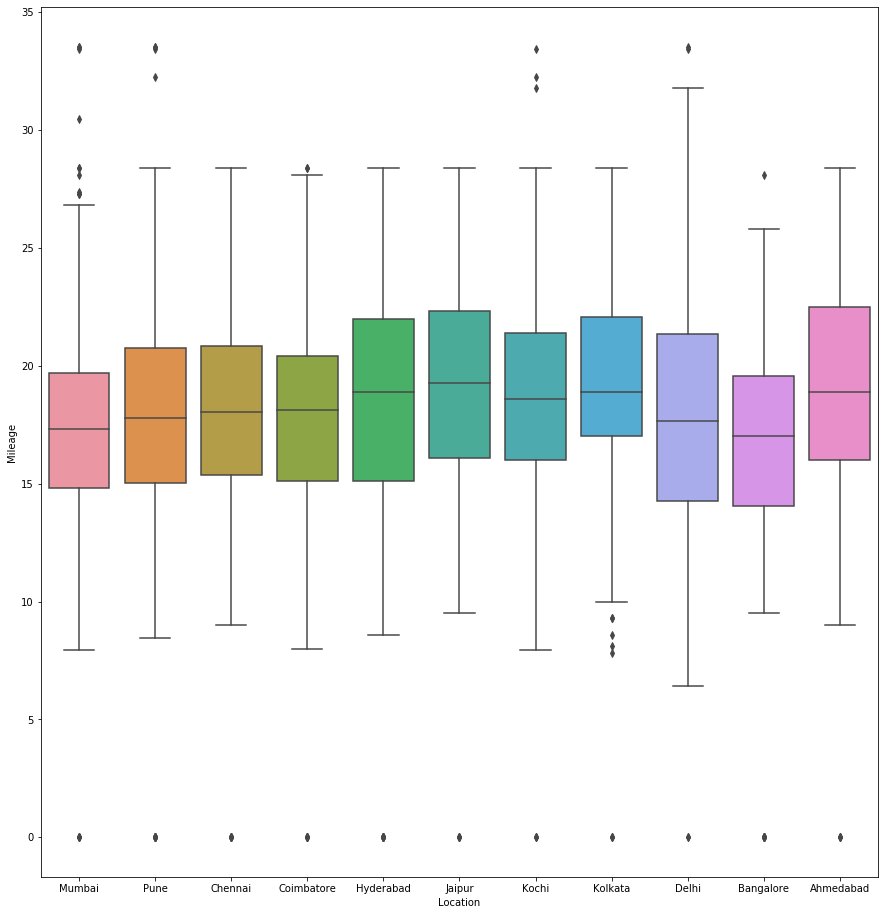

In [32]:
plt.figure(figsize=(15,16))
sns.boxplot(x = 'Location', y = 'Mileage', data = df_train) 
plt.show()

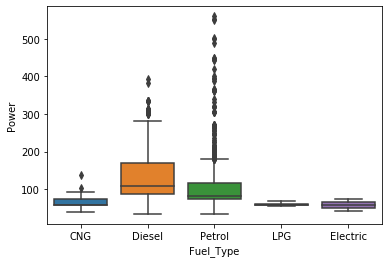

In [33]:
sns.boxplot(x = 'Fuel_Type', y = 'Power', data = df_train)
plt.show()

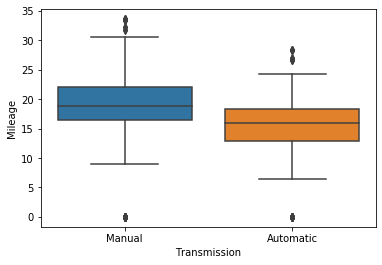

In [34]:
sns.boxplot(x = 'Transmission', y = 'Mileage', data = df_train)
plt.show()

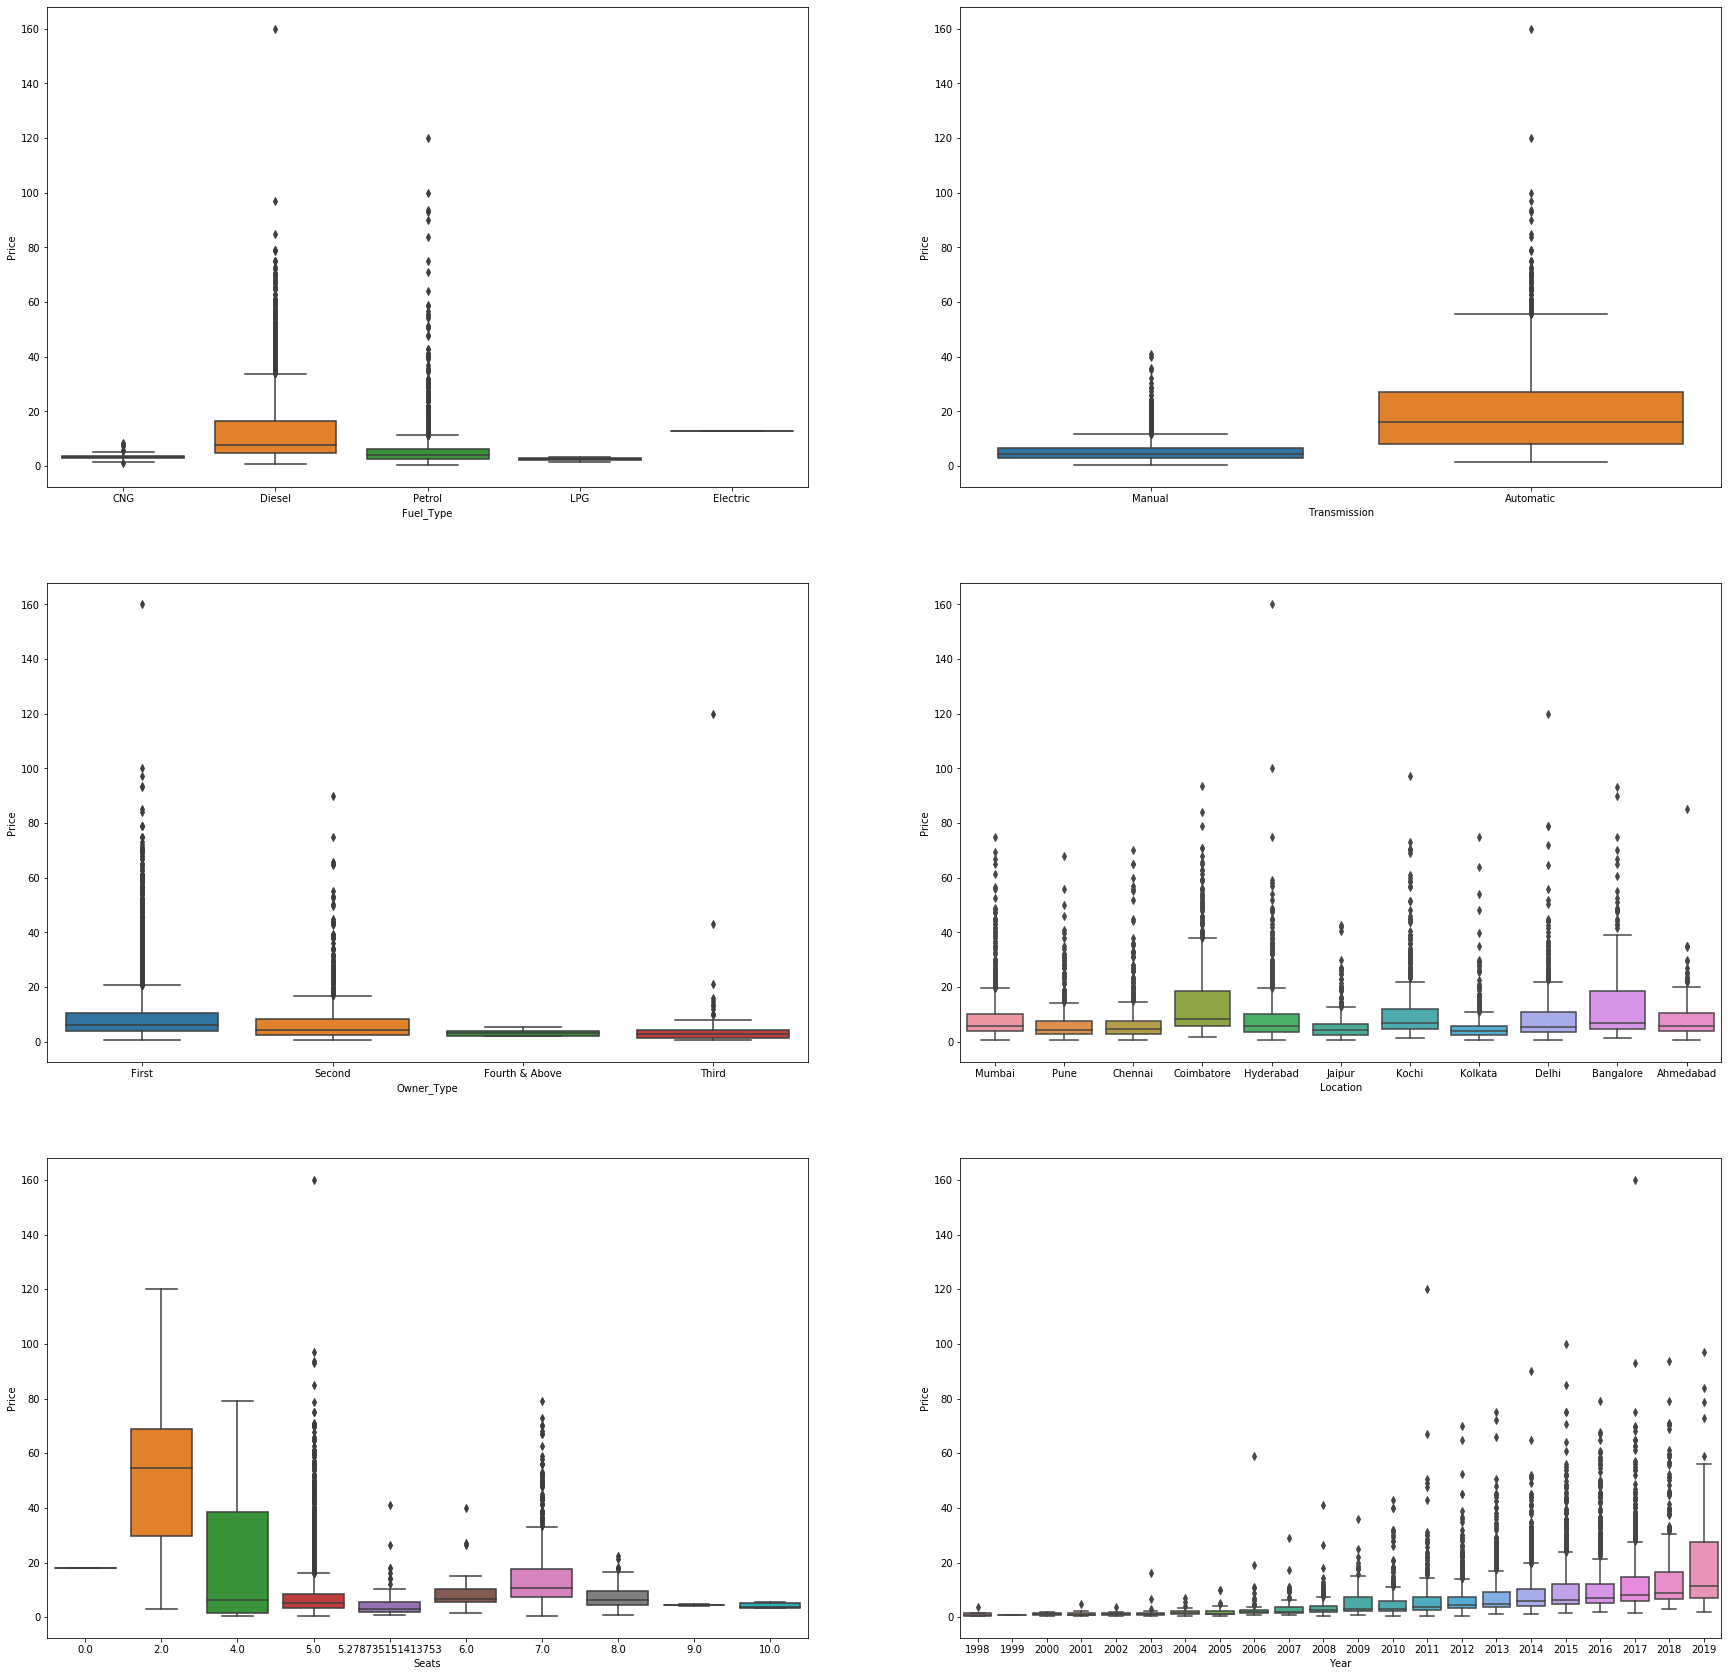

In [35]:
plt.figure(figsize = (30,30))

plt.subplot(3,2,1)
sns.boxplot(x = 'Fuel_Type', y = 'Price', data = df_train)

plt.subplot(3,2,2)
sns.boxplot(x = 'Transmission', y = 'Price', data = df_train)

plt.subplot(3,2,3)
sns.boxplot(x = 'Owner_Type', y = 'Price', data = df_train)

plt.subplot(3,2,4)
sns.boxplot(x = 'Location', y = 'Price', data = df_train)

plt.subplot(3,2,5)
sns.boxplot(x = 'Seats', y = 'Price', data = df_train)

plt.subplot(3,2,6)
sns.boxplot(x = 'Year', y = 'Price', data = df_train)


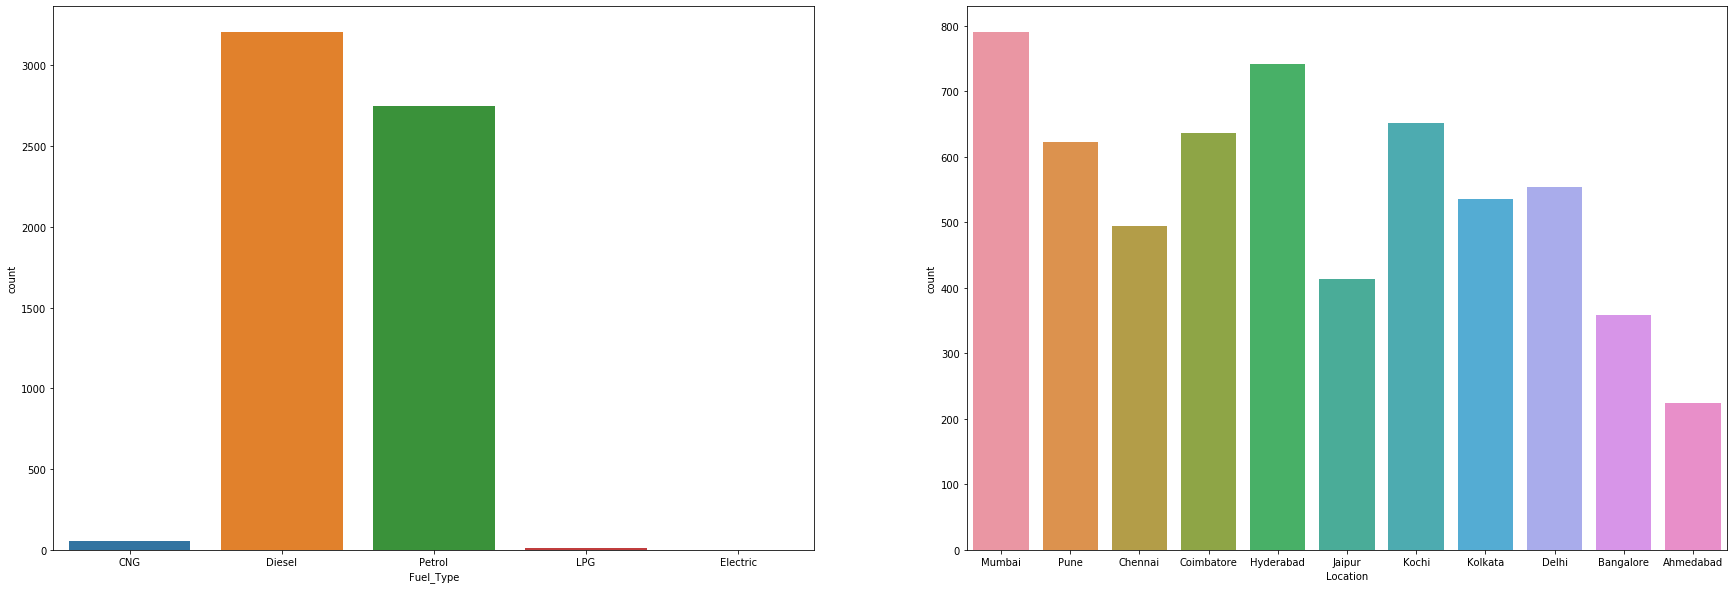

In [36]:
# Categorical variables visualisation
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x='Fuel_Type',data=df_train)
plt.subplot(1,2,2)
sns.countplot(x='Location',data=df_train)
plt.show()

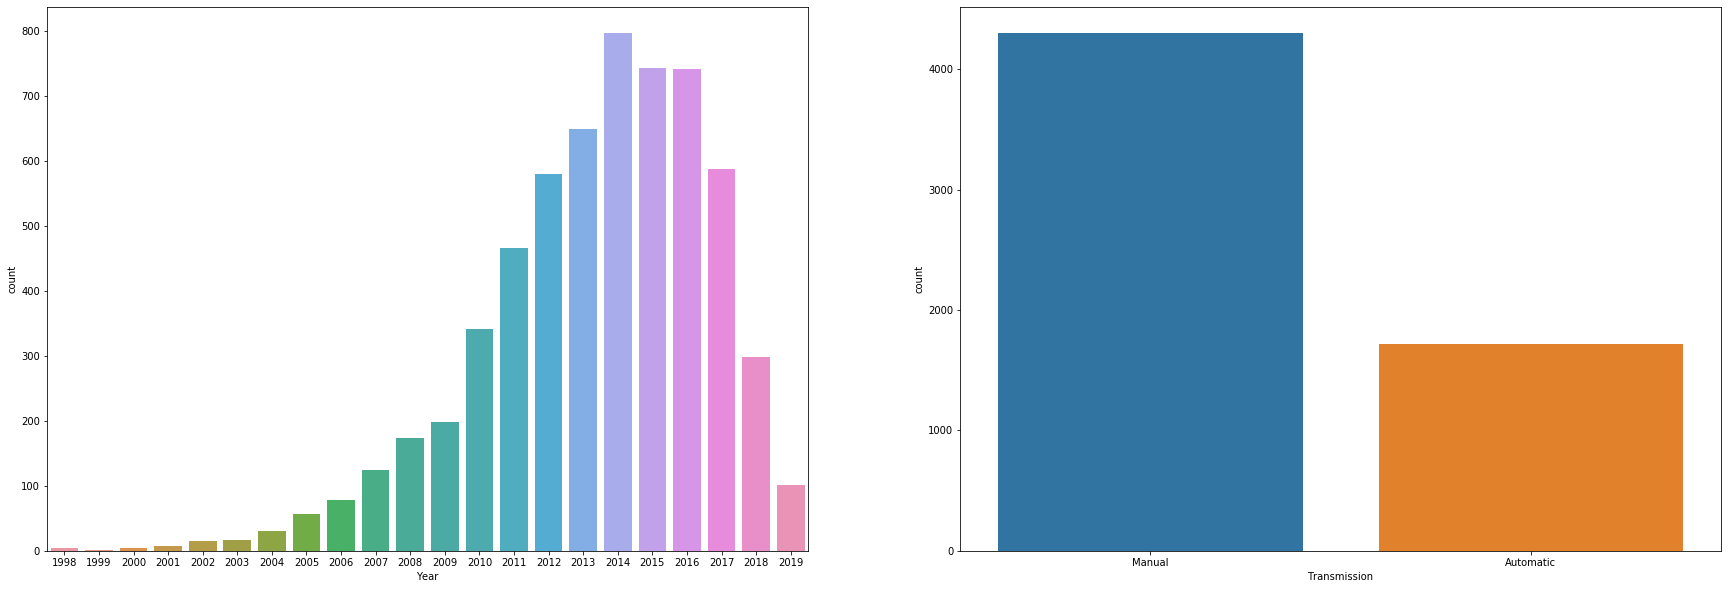

In [37]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.countplot(x='Year',data=df_train)
plt.subplot(1,2,2)
sns.countplot(x='Transmission',data=df_train)
plt.show()

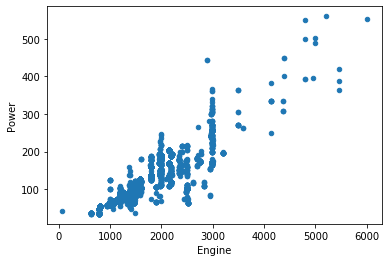

In [38]:
df_train.plot(kind='scatter',x='Engine',y='Power')
plt.show()

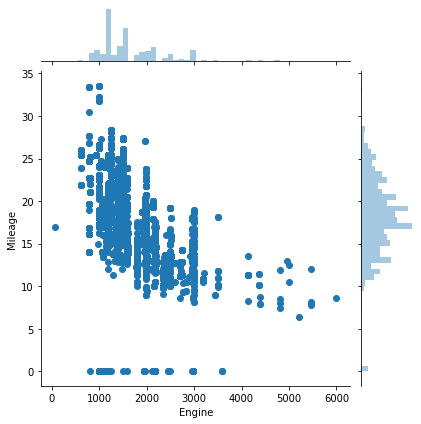

In [39]:
sns.jointplot(kind='scatter',x='Engine',y='Mileage',data=df_train)
plt.show()

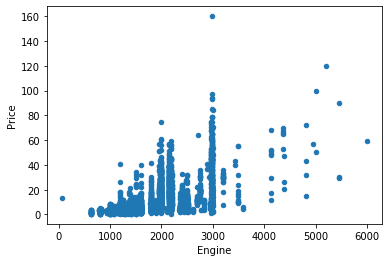

In [40]:
df_train.plot(kind='scatter',x='Engine',y='Price')
plt.show()

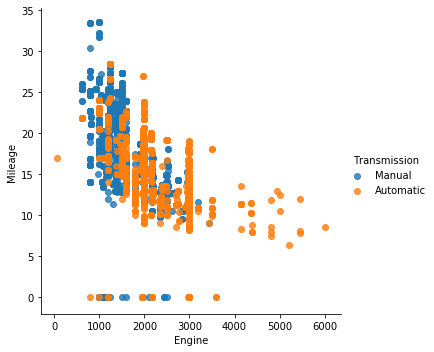

In [41]:
sns.lmplot(x='Engine',y='Mileage',data=df_train,hue='Transmission',fit_reg=False)
plt.show()

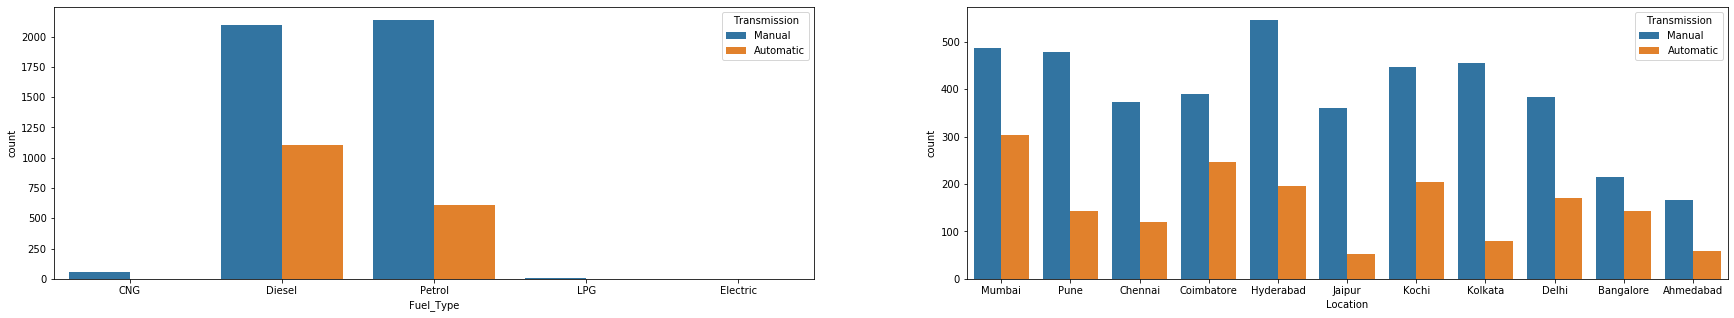

In [42]:
plt.figure(figsize=(30,5))

plt.subplot(1,2,1)
sns.countplot(x='Fuel_Type', hue='Transmission', data=df_train);

plt.subplot(1,2,2)
sns.countplot(x='Location', hue='Transmission', data=df_train);

plt.show()

In [43]:
pd.crosstab(df_train['Name'], df_train['Transmission']).T

Name,Ambassador,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Porsche,Renault,Skoda,Smart,Tata,Toyota,Volkswagen,Volvo
Transmission,,,,,,,,,,,,,,,,,,,,,
Automatic,0,236,267,1,9,0,0,0,39,130,...,6,12,17,18,93,1,11,99,59,20
Manual,1,0,0,0,112,13,28,3,261,478,...,21,79,1,127,80,0,175,312,256,1


In [44]:
df_test.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,Maruti,Delhi,2014,40929,CNG,Manual,First,32.26,998.0,58.20,4.0
1,Maruti,Coimbatore,2013,54493,Petrol,Manual,Second,24.70,796.0,47.30,5.0
2,Toyota,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393.0,147.80,7.0
3,Toyota,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364.0,NaN,5.0
4,Hyundai,Mumbai,2014,29000,Petrol,Manual,First,18.50,1197.0,82.85,5.0


### Categorizing the variables

In [45]:
all_names = list(set(list(df_train.Name) + list(df_test.Name)))
all_locations = list(set(list(df_train.Location) + list(df_test.Location)))
all_fuel_types = list(set(list(df_train.Fuel_Type) + list(df_test.Fuel_Type)))
all_transmissions = list(set(list(df_train.Transmission) + list(df_test.Transmission)))
all_owner_types = list(set(list(df_train.Owner_Type) + list(df_test.Owner_Type)))

### Label Encoding

In [46]:
#initializing label encoders
from sklearn.preprocessing import LabelEncoder
le_names = LabelEncoder()
le_locations = LabelEncoder()
le_fuel_types = LabelEncoder()
le_transmissions = LabelEncoder()
le_owner_types = LabelEncoder()

In [47]:
#fitting the categories
le_names.fit(all_names)
le_locations.fit(all_locations)
le_fuel_types.fit(all_fuel_types)
le_transmissions.fit(all_transmissions)
le_owner_types.fit(all_owner_types)

LabelEncoder()

In [48]:
#Applying encoding to df_train data
df_train['Name'] = le_names.transform(df_train['Name'])
df_train['Location'] = le_locations.transform(df_train['Location'])
df_train['Fuel_Type'] = le_fuel_types.transform(df_train['Fuel_Type'])
df_train['Transmission'] = le_transmissions.transform(df_train['Transmission'])
df_train['Owner_Type'] = le_owner_types.transform(df_train['Owner_Type'])

In [49]:
#Applying encoding to df_test data
df_test['Name'] = le_names.transform(df_test['Name'])
df_test['Location'] = le_locations.transform(df_test['Location'])
df_test['Fuel_Type'] = le_fuel_types.transform(df_test['Fuel_Type'])
df_test['Transmission'] = le_transmissions.transform(df_test['Transmission'])
df_test['Owner_Type'] = le_owner_types.transform(df_test['Owner_Type'])

In [50]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,19,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,11,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,10,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0,4.50
3,19,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [51]:
# Dependent Variable
Y_train_data = df_train.iloc[:, -1]

# Independent Variables
X_train_data = df_train.iloc[:,0 : -1]

# Independent Variables for test Set
X_test = df_test.iloc[:,:]

In [52]:
X_train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0
1,11,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0
2,10,2,2011,46000,4,1,0,18.20,1199.0,88.70,5.0
3,19,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0
4,1,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0
...,...,...,...,...,...,...,...,...,...,...,...
6014,19,4,2014,27365,1,1,0,28.40,1248.0,74.00,5.0
6015,11,6,2015,100000,1,1,0,24.40,1120.0,71.00,5.0
6016,18,6,2012,55000,1,1,2,14.00,2498.0,112.00,8.0
6017,19,8,2013,46000,4,1,0,18.90,998.0,67.10,5.0


In [53]:
X_test

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
0,19,4,2014,40929,0,1,0,32.26,998.0,58.20,4.0
1,19,3,2013,54493,4,1,2,24.70,796.0,47.30,5.0
2,30,9,2017,34000,1,1,0,13.68,2393.0,147.80,7.0
3,30,5,2012,139000,1,1,0,23.59,1364.0,NaN,5.0
4,11,9,2014,29000,4,1,0,18.50,1197.0,82.85,5.0
...,...,...,...,...,...,...,...,...,...,...,...
1229,31,5,2011,89411,1,1,0,20.54,1598.0,103.60,5.0
1230,31,9,2015,59000,4,0,0,17.21,1197.0,103.60,5.0
1231,23,8,2012,28000,1,1,0,23.08,1461.0,63.10,5.0
1232,31,10,2013,52262,4,0,3,17.20,1197.0,103.60,5.0


In [54]:
Y_train_data

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

### Model

In [55]:
from sklearn.model_selection import train_test_split
#Splitting the training set into Training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_train_data, Y_train_data, test_size = 0.2)

In [56]:
Y_train

854     14.50
5146    31.41
4558    33.75
397      3.50
4653    11.13
        ...  
4411     3.77
4106     8.50
5140    24.95
3154     3.10
2677     2.25
Name: Price, Length: 4815, dtype: float64

In [57]:
Y_val

268      2.00
3990     5.35
5833     6.35
4408     2.45
5197     3.50
        ...  
3857     3.59
5830     8.00
2368     6.00
560      5.00
1807    24.50
Name: Price, Length: 1204, dtype: float64

In [58]:
#XGBoost
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators = 500,learning_rate=0.1, max_depth=4, min_child_weight=2, n_jobs=4)
xgb.fit(X_train, Y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_val, Y_val)], 
             verbose=False)
Y_pred = xgb.predict(X_val)

In [59]:
Y_pred

array([ 1.8732508,  4.872151 ,  6.042237 , ...,  5.267389 ,  4.850996 ,
       24.717049 ], dtype=float32)

In [60]:
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [61]:
#Eliminating negative values in prediction for score calculation
for i in range(len(Y_pred)):
     if Y_pred[i] < 0:
        Y_pred[i] = 0
        
y_true = Y_val

In [62]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from statistics import mean
        
print("Score: ",score(Y_pred,y_true))
print("Mean Absolute Error:",mean_absolute_error(y_true, Y_pred))

Score:  0.9226724640499794
Mean Absolute Error: 1.4388528287034494


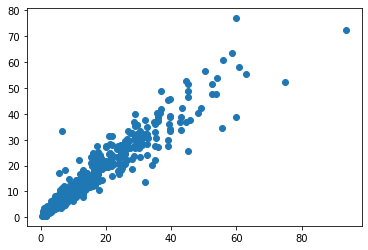

In [63]:
plt.scatter(y_true,Y_pred)
plt.show()

In [64]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y_true,Y_pred))
print(rms)

2.81329828848063
